<h1 style='text-align: center'><strong>Unsupervised learning</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Movies recommendation</strong></h2>

<h3 style='text-align: center'>Movie clustering based on unsupervised learning</h3>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Data">Data</a></li>
        <li><a href="#Merge-Datasets">Merge datasets</a></li>
        <li><a href="#Pivot-Table-Creation">Pivot table creation</a></li>
        <li><a href="#Scaling-The-Data">Scaling the data</a></li>
        <li><a href="#KMeans-Clustering">KMeans clustering</a></li>
        <li><a href="#Fine-Tuning">Fine tuning</a></li>
        <li><a href="#Recommendations">Recommendations</a></li>
        <li><a href="#Conclusion">Conclusion</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

In this notebook, we will use unsupervised learning to cluster movies based on their genres. We will use the KMeans algorithm to cluster the movies and make recommendations based on the clusters. 

The dataset used in this notebook is the MovieLens dataset, which contains information about movies and ratings.

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

- pandas: Used for data manipulation and analysis, particularly for loading and merging datasets.
- KMeans: From sklearn.cluster, used for applying the K-means clustering algorithm.
- StandardScaler: From sklearn.preprocessing, used for standardizing features by removing the mean and scaling to unit variance.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

<h2 style='text-align: center' id='Data'><strong>3. Data</strong></h2>

<h5 style='text-align: center'><a href='https://www.kaggle.com/datasets/aigamer/movie-lens-dataset'>Movie Lens Dataset</a></h5>

- movies: DataFrame containing movie information such as movieId and title.
- ratings: DataFrame containing user ratings, including userId, movieId, and rating.

In [2]:
# Load the datasets
movies = pd.read_csv('Dataset/movies.csv')
ratings = pd.read_csv('Dataset/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<h2 style='text-align: center' id='Merge-Datasets'><strong>4. Merge datasets</strong></h2>

Merges the ratings and movies DataFrames on the movieId column to combine movie titles with their corresponding ratings.

In [5]:
# Merge the movies and ratings datasets on 'movieId'
movie_data = pd.merge(ratings, movies, on='movieId')

movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


<h2 style='text-align: center' id='Pivot-Table-Creation'><strong>5. Pivot table creation</strong></h2>

- Creates a pivot table where rows are userId, columns are title, and values are rating.
- Missing values are filled with 0 using .fillna(0) to handle users who haven't rated certain movies.

In [6]:
# Pivot table to create a matrix of users and their ratings for each movie
features = movie_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

features.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 style='text-align: center' id='Scaling-The-Data'><strong>6. Scaling the data</strong></h2>

- StandardScaler: Scales the feature values to have a mean of 0 and a standard deviation of 1.
- features.T: Transposes the pivot table to have movies as rows and users as columns before scaling.

In [7]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.T)

<h2 style='text-align: center' id='KMeans-Clustering'><strong>7. KMeans clustering</strong></h2>

<h3>Starting with K=10</h3>

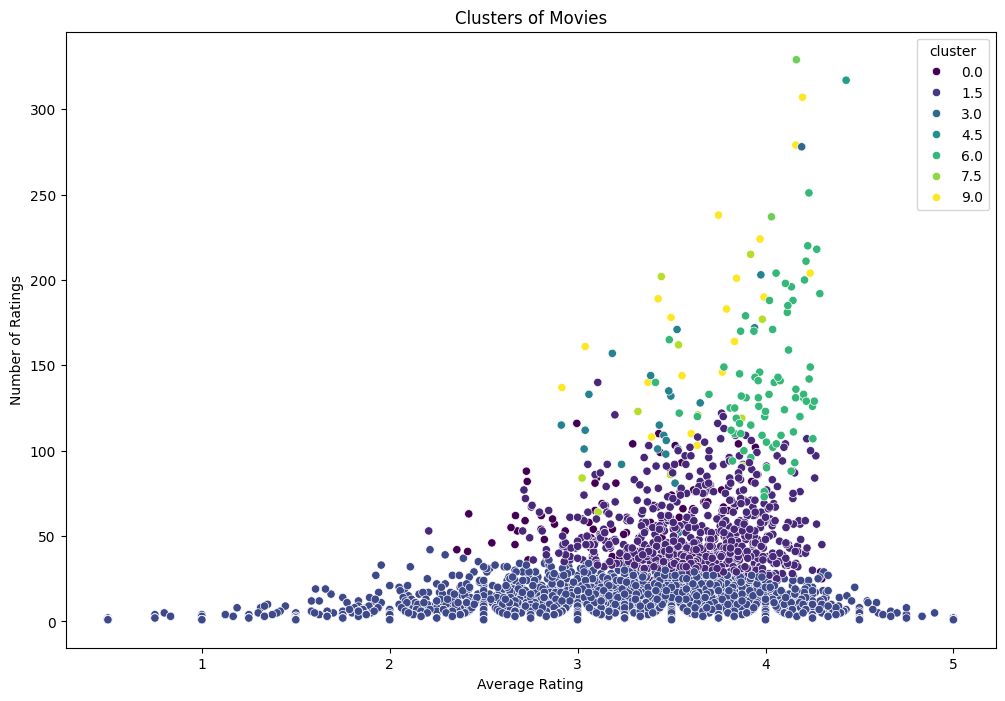

In [8]:
k = 10
scaled_data = scaled_features
original_data = features

model = KMeans(n_clusters=k, random_state=0)

# Fit the model to the scaled data
model.fit(scaled_data)

# Predict the cluster for each movie
movie_clusters = model.predict(scaled_data)

# Create a DataFrame with movie titles and their assigned clusters
movie_titles = original_data.columns
clustered_movies = pd.DataFrame({'title': movie_titles, 'cluster': movie_clusters})

# Merge the cluster information back to the original movies DataFrame
merged_movies = pd.merge(movies, clustered_movies, on='title', how='left')

movies = merged_movies

# Calculate average rating and number of ratings
avg_ratings = movie_data.groupby('title')['rating'].mean().reset_index()
num_ratings = movie_data.groupby('title')['rating'].count().reset_index()

# Merge the calculated data with movies DataFrame
movies = pd.merge(movies, avg_ratings, on='title')
movies = pd.merge(movies, num_ratings, on='title', suffixes=('_avg', '_count'))

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating_avg', y='rating_count', hue='cluster', data=movies, palette='viridis')
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.show()

<h2 style='text-align: center' id='Recommendations'><strong>8. Fine-Tuning</strong></h2>



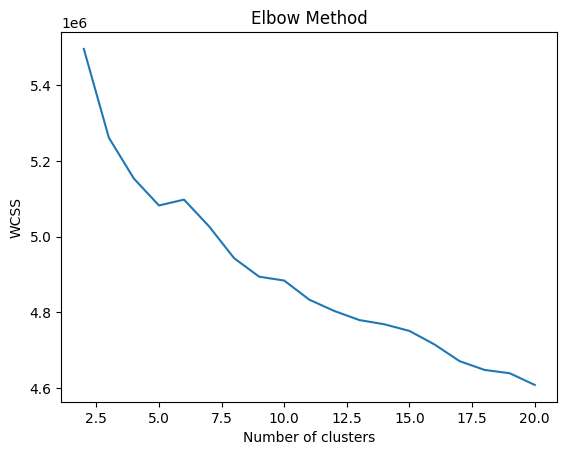

In [9]:
# Elbow Method
wcss = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

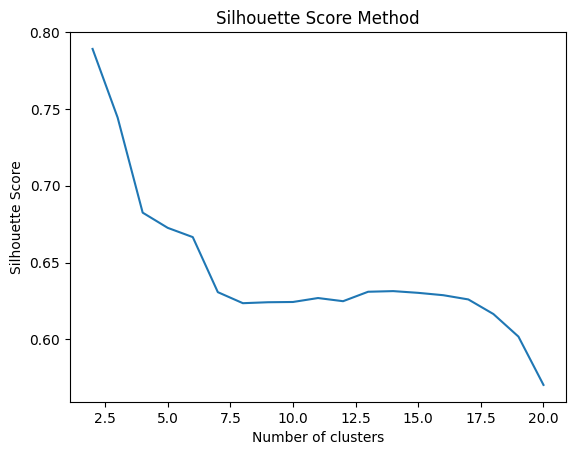

In [10]:
# Silhouette Score Method
silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 21), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

<h3 style='text-align: center'> Choosing the best K = 5 </h3>

Based on the Elbow Method and Silhouette Score, we choose K=5 as the optimal number of clusters. If we see in the graph, the inertia decreases significantly until K=5, and then the decrease is less pronounced. The silhouette score is also higher for K=5, indicating that the clusters are more distinct.

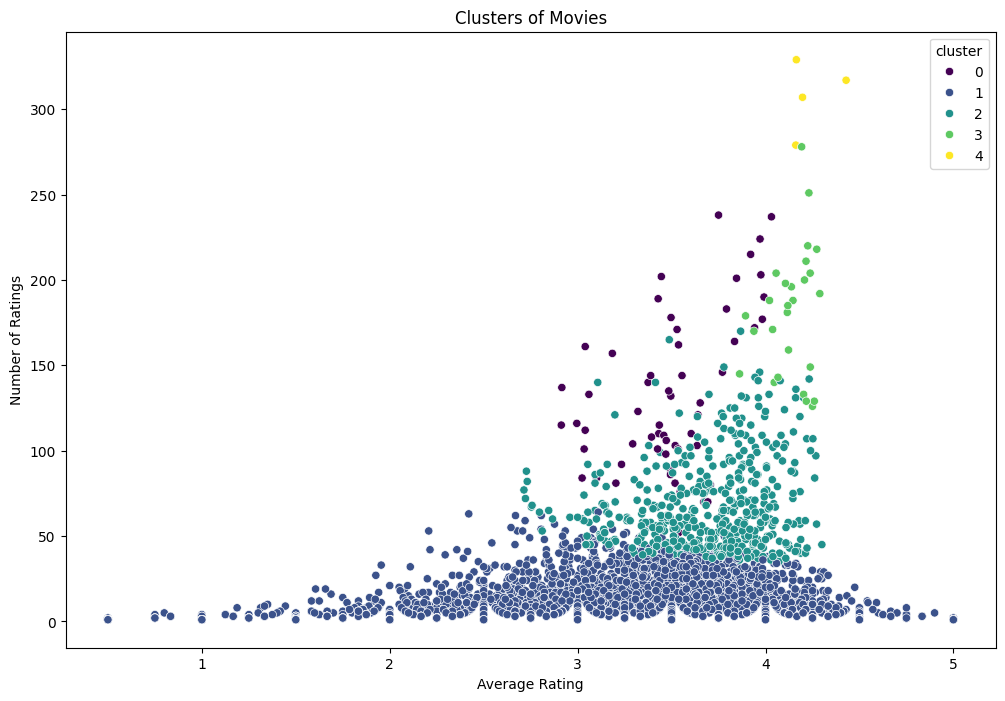

In [12]:
k = 5
scaled_data = scaled_features
original_data = features

model = KMeans(n_clusters=k, random_state=0)

# Fit the model to the scaled data
model.fit(scaled_data)

# Predict the cluster for each movie
movie_clusters = model.predict(scaled_data)

# Create a DataFrame with movie titles and their assigned clusters
movie_titles = original_data.columns
clustered_movies = pd.DataFrame({'title': movie_titles, 'cluster': movie_clusters})

# Merge the cluster information back to the original movies DataFrame
merged_movies = pd.merge(movies, clustered_movies, on='title', how='left')

movies = merged_movies

# Calculate average rating and number of ratings
avg_ratings = movie_data.groupby('title')['rating'].mean().reset_index()
num_ratings = movie_data.groupby('title')['rating'].count().reset_index()

# Merge the calculated data with movies DataFrame
movies = pd.merge(movies, avg_ratings, on='title')
movies = pd.merge(movies, num_ratings, on='title', suffixes=('_avg', '_count'))

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating_avg', y='rating_count', hue='cluster', data=movies, palette='viridis')
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.show()

<h2 style='text-align: center' id='Recommendations'><strong>9. Recommendations</strong></h2>

<h3 style='text-align: center'>Recommend movies function</h3>

- Defining a function to recommend movies based on the cluster of the given movie_title.
- Finding the cluster label of the specified movie_title.
- Retrieving titles of movies that belong to the same cluster as the given movie_title.

In [20]:
Movies_clustered = movies

def recommend_movies(movie_title):
    # Get the cluster of the given movie
    cluster = Movies_clustered[Movies_clustered['title'] == movie_title]['cluster'].values[0]

    # Get the movies in the same cluster
    recommended_movies = Movies_clustered[Movies_clustered['cluster'] == cluster]

    # Just select the columns 'movieId', 'title', 'genres', 'cluster'
    recommended_movies = recommended_movies[['movieId', 'title', 'genres', 'cluster']]

    return recommended_movies

<h3 style='text-align: center'>Recommendations</h3>

In [21]:
# Example recommendation
recommend_movies('Toy Story (1995)')

,movieId,title,genres,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0
20,21,Get Shorty (1995),Comedy|Crime|Thriller,0
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,0
32,34,Babe (1995),Children|Drama,0
35,39,Clueless (1995),Comedy|Romance,0
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0
55,62,Mr. Holland's Opus (1995),Drama,0


In [22]:
recommend_movies('Jumanji (1995)')

,movieId,title,genres,cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0
20,21,Get Shorty (1995),Comedy|Crime|Thriller,0
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,0
32,34,Babe (1995),Children|Drama,0
35,39,Clueless (1995),Comedy|Romance,0
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0
55,62,Mr. Holland's Opus (1995),Drama,0


In [23]:
recommend_movies('Heat (1995)')

,movieId,title,genres,cluster
5,6,Heat (1995),Action|Crime|Thriller,2
15,16,Casino (1995),Crime|Drama,2
16,17,Sense and Sensibility (1995),Drama|Romance,2
18,19,Ace Ventura: When Nature Calls (1995),Comedy,2
24,25,Leaving Las Vegas (1995),Drama|Romance,2
...,...,...,...,...
8663,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,2
8665,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,2
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,2
8861,134130,The Martian (2015),Adventure|Drama|Sci-Fi,2


In [24]:
recommend_movies('Think Like a Man (2012)')

,movieId,title,genres,cluster
2,3,Grumpier Old Men (1995),Comedy|Romance,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1
4,5,Father of the Bride Part II (1995),Comedy,1
6,7,Sabrina (1995),Comedy|Romance,1
7,8,Tom and Huck (1995),Adventure|Children,1
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1
9721,193585,Flint (2017),Drama,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1


<h2 style='text-align: center' id='Conclusion'><strong>10. Conclusion</strong></h2>

In this notebook, we used unsupervised learning to classify movies based on their genres. We applied the KMeans algorithm to classify the movies and make recommendations based on the clusters. We found that K=5 was the optimal number of clusters based on the Elbow Method and Silhouette Score. We then created a function to recommend movies based on the cluster of a given movie title.

We have successfully classified movies based on their genres and made recommendations based on the clusters. This approach can be used to recommend movies to users based on their preferences and help them discover new movies they might like.

In conclusion, unsupervised learning can be a powerful tool for classifying and recommending movies based on their features. It can help users find movies they might enjoy and provide a personalized movie recommendation experience. Unsupservised learning can be used in various applications, such as recommendation systems, clustering, and classification, to provide valuable insights and recommendations to users.
